In [166]:
# 1vs1 match functions
def winner_civ(player, dict_civ):
    if player[0]['won'] == True:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def loser_civ(player, dict_civ):
    if player[0]['won'] == False:
        return dict_civ[player[0]['civ']] 
    else:
        return dict_civ[player[1]['civ']]

def get_average_rating (players):
    rat1=players[0]['rating']
    rat2=players[1]['rating']
    if rat1 == None or rat2 == None:
        if rat1 != None:
            return rat1
        if rat2 != None:
            return rat2
        
        return None
    else:
        return (rat1 + rat2)/2

# team match functions
def get_winner_team_number(players):
    for player in players:
        if player['won'] == True:
            return player['team']

def winner_civ_team(players, dict_civ, position):
    list_pos=[]
    for player in players:
        if player['won'] == True:
            t = (player['color'], player['civ'])
            list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def loser_civ_team(players, dict_civ, position):
    list_pos=[]
    winner_number=get_winner_team_number(players)
    for player in players:
        if player['won'] == False:
            if player['team'] != winner_number:
                t = (player['color'], player['civ'])
                list_pos.append(t)
    
    list_pos.sort()
    if position > len(list_pos):
        return None
    else:
        return dict_civ[list_pos[position - 1][1]]

def get_average_rating_team(players):
    rat_sum=0
    divider=0
    num_players=len(players)
    for player in players:
        if player['rating'] != None:
            rat_sum += player['rating']
            divider += 1
            
    if (divider < (num_players/2)):
        return None
    else:
        return (rat_sum/divider)

In [167]:
has_relevant_water = {
            "Arabia": False,
            "Archipelago": True,
            "Baltic": True,
            "Black Forest": False,
            "Coastal": True,
            "Continental": True,
            "Crater Lake": True,
            "Fortress": False,
            "Gold Rush": False,
            "Highland": True,
            "Islands": False,
            "Mediterranean": False,
            "Migration": False,
            "Rivers": False,
            "Team Islands": False,
            "Full Random": True,
            "Scandinavia": True,
            "Mongolia": False,
            "Yucatan": False,
            "Salt Marsh": True,
            "Arena": False,
            "Oasis": True,
            "Ghost Lake": False,
            "Nomad": True,
            "Iberia": True,
            "Britain": True,
            "Mideast": True,
            "Texas": True,
            "Italy": True,
            "Central America": True,
            "France": True,
            "Norse Lands": True,
            "Sea of Japan (East Sea)": True,
            "Byzantium": True,
            "Custom": True,
            "Random Land Map": False,
            "Random Real World Map": True,
            "Blind Random": True,
            "Random Special Map": True,
            "Acropolis": False,
            "Budapest": True,
            "Cenotes": True,
            "City of Lakes": True,
            "Golden Pit": False,
            "Hideout": False,
            "Hill Fort": False,
            "Lombardia": False,
            "Steppe": False,
            "Valley": False,
            "MegaRandom": True,
            "Hamburger": True,
            "CtR Random": True,
            "CtR Monsoon": False,
            "CtR Pyramid Descent": False,
            "CtR Spiral": False,
            "Kilimanjaro": False,
            "Mountain Pass": False,
            "Nile Delta": True,
            "Serengeti": False,
            "Socotra": False,
            "Amazon": True,
            "China": True,
            "Horn of Africa": True,
            "India": True,
            "Madagascar": True,
            "West Africa": True,
            "Bohemia": False,
            "Earth": True,
            "Canyons": False,
            "Enemy Archipelago": True,
            "Enemy Islands": True,
            "Far Out": False,
            "Front Line": False,
            "Inner Circle": False,
            "Motherland": True,
            "Open Plains": False,
            "Ring of Water": True,
            "Snakepit": True,
            "The Eye": True,
            "Australia": True,
            "Indochina": True,
            "Indonesia": True,
            "Strait of Malacca": True,
            "Philippines": True,
            "Bog Islands": True,
            "Mangrove Jungle": True,
            "Pacific Islands": True,
            "Sandbank": False,
            "Water Nomad": True,
            "Jungle Islands": True,
            "Holy Line": False,
            "Border Stones": False,
            "Yin Yang": True,
            "Jungle Lanes": False,
            "Alpine Lakes": False,
            "Bogland": False,
            "Mountain Ridge": False,
            "Ravines": False,
            "Wolf Hill": False,
            "Antarctica": True,
            "Custom Map Pool": True,
            "Golden Swamp": True,
            "Four Lakes": True,
            "Land Nomad": False
            }
import requests
import json

url="https://aoe2.net/api/strings?game=aoe2de&language=en"
req=requests.get(url)
dict_file=json.loads(req.content)

civ_dict={}
for civ in dict_file['civ']:
    civ_dict[civ['id']]=civ['string']

map_dict={}
for map_t in dict_file['map_type']:
    map_dict[map_t['id']]=map_t['string']

In [168]:
import pandas
from IPython.display import display
import matplotlib.pyplot as plt

df=pandas.read_json('matches_dataset_filtered.json', dtype={'match_id': int, 'match_uuid': 'string', 'num_players': int,
                                                        'map_type' : int, 'rating_type': int,'visibility' : int,
                                                        'duration' : float, 'players' : [dict]})
pandas.options.display.max_columns = None

In [169]:
df['num_players']=df['num_players'].astype('category')
df['map_type']=df['map_type'].astype('category')
df['rating_type']=df['rating_type'].astype('category')
df['visibility']=df['visibility'].astype('category')

In [170]:
df.dtypes

map_type       category
match_id          int64
match_uuid       object
num_players    category
players          object
rating_type    category
visibility     category
duration        float64
dtype: object

<span style="font-size:medium;">
Verificamos se o mapa tem água de forma distribuída por sua área, pois tecnologias e unidades navais só são relevantes para a analse se o mapa tiver água.
</span>

In [171]:
df['has_relevant_water']=df['map_type'].map(map_dict)
df['has_relevant_water']=df['has_relevant_water'].map(has_relevant_water)
df['has_relevant_water']=df['has_relevant_water'].astype('category')

In [172]:
df

,map_type,match_id,match_uuid,num_players,players,rating_type,visibility,duration,has_relevant_water
1,9,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",2,0,66.833333,False
2,9,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",2,0,19.900000,False
5,77,42282498,57cbd4d8-221e-a94d-bbd2-df7839333e5d,4,"[{'civ': 4, 'clan': None, 'color': 6, 'country...",4,0,4.633333,True
6,9,42282609,4df380fb-954c-6e4e-861a-9b0894f6be16,2,"[{'civ': 5, 'clan': None, 'color': 2, 'country...",2,0,43.833333,False
8,29,42282481,1fb40655-3a85-cf46-bd8b-d2ac6b28aa0d,6,"[{'civ': 22, 'clan': None, 'color': 6, 'countr...",4,0,62.700000,False
...,...,...,...,...,...,...,...,...,...
399992,9,47896623,581948b9-421f-144a-b571-83d449151177,6,"[{'civ': 10, 'clan': None, 'color': 4, 'countr...",4,0,31.466667,False
399993,76,47896612,90bf8bd4-521b-d64f-b1bf-86237d3ee218,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",2,0,74.400000,False
399994,9,47896606,1a2644ca-a25f-0340-ac41-51d5c3ef9067,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",2,0,25.866667,False
399996,9,47896537,8af937ef-9f44-8845-98b5-09b9e6fcefc5,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",2,0,14.300000,False


<span style="font-size:medium;">
Separamos o DataFrame em dois: um para partidas onde há apenas um jogador contra outro, "df_x1", e outro para partidas de time, "df_team". As dinâmicas de times, sinergia entre as civilizações e se uma está em uma posição de flanco enquanto seu aliado fica por trás das linhas de combate influenciam no combate.
</span>

In [173]:
df_x1=df[df['rating_type'] == 2]
df_team=df[df['rating_type'] == 4]

df_x1=df_x1.drop('rating_type', 1)
df_team=df_team.drop('rating_type', 1)

<span style="font-size:medium;">
extraímos qual civilização ganhou ou perdeu, a partir da coluna "players", e criamos duas colunas: "wCiv" para os vencedores e "lCiv" para os perdedores.

Também extraímos a informação da classificação (ou "rating") de cada jogador e calculamos o "rating" médio da partida. Os jogadores são pareados na partida através da sua classificação, o que significa que os jogadores das partidas têm classificações muito próximas. Portanto, em df_x1, se a informação da classificação de um dos jogadores não estiver presente, o "rating" médio será calculado como sendo equivalente ao rating do outro jogador.
</span>

In [174]:
df_x1['wCiv']=df_x1['players'].apply(winner_civ, args=(civ_dict, ))

df_x1['lCiv']=df_x1['players'].apply(loser_civ, args=(civ_dict, ))

df_x1['average_rating']=df_x1['players'].apply(get_average_rating)

In [175]:
df_x1['wCiv']=df_x1['wCiv'].astype('category')
df_x1['lCiv']=df_x1['lCiv'].astype('category')

In [176]:
len(df_x1)

147586

In [177]:
len(df_x1[df_x1['average_rating'].isnull()])

1103

<span style="font-size:medium;">
Em algumas partidas a classificação de ambos os jogadores foi perdida, portanto algumas linhas na coluna "average_rating" ficaram como "NaN", como são poucas linhas optamos por excluí-las.
</span>


In [178]:
df_x1=df_x1[df_x1['average_rating'].isnull() == False]
df_x1

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating
1,9,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",0,66.833333,False,Magyars,Franks,1238.0
2,9,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",0,19.900000,False,Slavs,Mayans,1085.0
6,9,42282609,4df380fb-954c-6e4e-861a-9b0894f6be16,2,"[{'civ': 5, 'clan': None, 'color': 2, 'country...",0,43.833333,False,Chinese,Byzantines,1247.5
9,17,42282619,d9986512-6053-fd47-8d1b-c38708654d09,2,"[{'civ': 2, 'clan': None, 'color': 2, 'country...",0,71.200000,False,Britons,Aztecs,997.0
10,9,42282625,17f5da6f-058b-8f4c-ab60-170152c3899e,2,"[{'civ': 23, 'clan': None, 'color': 2, 'countr...",0,20.266667,False,Huns,Mayans,1087.0
...,...,...,...,...,...,...,...,...,...,...,...
399990,9,47896609,319b75e9-590a-0b49-811b-b8f2360d8ebf,2,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,37.133333,False,Aztecs,Mongols,1555.0
399991,9,47896625,8ec9b696-a424-f446-ae0d-8a652583e84e,2,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,62.966667,False,Incas,Franks,1230.5
399993,76,47896612,90bf8bd4-521b-d64f-b1bf-86237d3ee218,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",0,74.400000,False,Goths,Britons,829.0
399994,9,47896606,1a2644ca-a25f-0340-ac41-51d5c3ef9067,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",0,25.866667,False,Aztecs,Huns,1105.5


A coluna de "players" já não é mais necessária.

In [179]:
df_x1=df_x1.drop('players', 1)

<span style="font-size:medium;">

Semelhante como fizemos em df_x1, criamos colunas para os vencedores e perdedores, as partidas podem ter até 4 jogadores por time, portanto separamos 4 colunas para os vencedores e 4 colunas para os perdedores, caso os times sejam compostos por 3 membros cada, as ultimas colunas terão o valor "None" atribuído a elas, analogamente acontece se a partida for compostas por times de 2 participantes em cada.

As civilizaçẽos estão dispostas nas colunas respeitando a ordem em que elas estavam distribuídas em batalha, um exemplo: em um jogo de 3 contra 3, a coluna "wCiv1" seria ocupada pela civilização, do time vencedor, que estava em um dos flanco da batalha, a coluna "wCiv2" seria ocupada pela civilização do time vencedor que ficou guardada entre suas aliadas, e a coluna "wCiv3" seria ocupada pela civilização, do time vencedor, que estava no outro flanco da batalha, analogamente acontece com o time perdedor. De forma semelhante acontece com partidas de 4 jogadores contra 4 jogadores.
</span>

<span style="font-size:medium;">
Semelhante como fizemos em df_x1, calculamos o "rating" médio da partida. Porém, em df_team, caso a informação sobre a classificação de mais da metade dos jogadores estivesse ausente, o valor atribuído seria NaN, caso ao menos metade dos jogadores estivessem com sua classificação presente nos dados, o "rating" médio seria a média do "rating" desses jogadores restantes.
</span>

In [180]:
df_team['wCiv1']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 1))
df_team['wCiv2']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 2))
df_team['wCiv3']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 3))
df_team['wCiv4']=df_team['players'].apply(winner_civ_team, args=(civ_dict, 4))

df_team['lCiv1']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 1))
df_team['lCiv2']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 2))
df_team['lCiv3']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 3))
df_team['lCiv4']=df_team['players'].apply(loser_civ_team, args=(civ_dict, 4))


df_team['average_rating']=df_team['players'].apply(get_average_rating_team)

In [181]:
df_team['wCiv1']=df_team['wCiv1'].astype('category')
df_team['wCiv2']=df_team['wCiv2'].astype('category')
df_team['wCiv3']=df_team['wCiv3'].astype('category')
df_team['wCiv4']=df_team['wCiv4'].astype('category')

df_team['lCiv1']=df_team['lCiv1'].astype('category')
df_team['lCiv2']=df_team['lCiv2'].astype('category')
df_team['lCiv3']=df_team['lCiv3'].astype('category')
df_team['lCiv4']=df_team['lCiv4'].astype('category')

In [182]:
len(df_team)

69772

In [183]:
len(df_team[df_team['average_rating'].isnull()])

1379

<span style="font-size:medium;">
Da mesma forma que fizemos em df_x1, excluímos as linhas que continuaram como "NaN" em "average_rating".
</span>

In [184]:
df_team=df_team[df_team['average_rating'].isnull() == False]
df_team

,map_type,match_id,match_uuid,num_players,players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating
5,77,42282498,57cbd4d8-221e-a94d-bbd2-df7839333e5d,4,"[{'civ': 4, 'clan': None, 'color': 6, 'country...",0,4.633333,True,Bulgarians,Burmese,NaN,NaN,Celts,Koreans,NaN,NaN,1694.750000
8,29,42282481,1fb40655-3a85-cf46-bd8b-d2ac6b28aa0d,6,"[{'civ': 22, 'clan': None, 'color': 6, 'countr...",0,62.700000,False,Britons,Persians,Teutons,NaN,Mayans,Italians,Malians,NaN,1357.000000
19,77,42282604,1221efe9-f961-f042-af84-debe1b032c6a,4,"[{'civ': 10, 'clan': None, 'color': 2, 'countr...",0,44.833333,True,Celts,Persians,NaN,NaN,Franks,Mayans,NaN,NaN,1325.750000
25,9,42282547,bf9e439d-5aae-8a43-ac55-259f28a0ba2e,6,"[{'civ': 8, 'clan': None, 'color': 8, 'country...",0,81.833333,False,Huns,Mayans,Cumans,NaN,Lithuanians,Mayans,Franks,NaN,1504.000000
41,29,42282612,f4954d77-d711-3248-a9e8-00a41006c3e1,8,"[{'civ': 17, 'clan': None, 'color': 6, 'countr...",0,49.500000,False,Celts,Goths,Khmer,Britons,Britons,Malay,Tatars,Turks,1883.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399979,9,47896522,2f812674-8e39-af4d-9b89-c65621964b2d,4,"[{'civ': 24, 'clan': None, 'color': 2, 'countr...",0,3.533333,False,Mongols,Magyars,NaN,NaN,Britons,Khmer,NaN,NaN,1916.333333
399983,9,47896469,204a2d8d-c9c9-204f-8f44-86bb731db8f8,4,"[{'civ': 7, 'clan': None, 'color': 2, 'country...",0,16.033333,False,Slavs,Franks,NaN,NaN,Chinese,Franks,NaN,NaN,1180.333333
399984,11,47896454,82594bc0-9126-3e48-aba5-49cd1b076cd1,6,"[{'civ': 34, 'clan': None, 'color': 6, 'countr...",0,44.400000,True,Spanish,Japanese,Vikings,NaN,Persians,Celts,Spanish,NaN,1259.500000
399992,9,47896623,581948b9-421f-144a-b571-83d449151177,6,"[{'civ': 10, 'clan': None, 'color': 4, 'countr...",0,31.466667,False,Britons,Aztecs,Franks,NaN,Britons,Franks,Aztecs,NaN,1703.500000


In [185]:
df_team=df_team.drop('players', 1)

<AxesSubplot:>

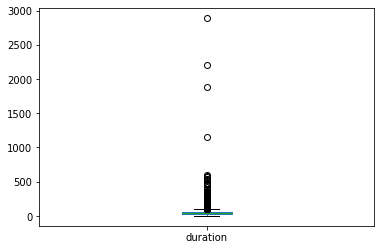

In [186]:
df_x1['duration'].plot.box()

<AxesSubplot:>

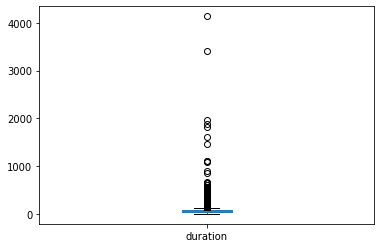

In [187]:
df_team['duration'].plot.box()

<span style="font-size:larger;">Remoção de outliers</span>

As próximas células serão referente a remoção de outliers, para tal usaremos a técnica tukey para identificar e remover os outliers de df_x1 e df_team.

<AxesSubplot:>

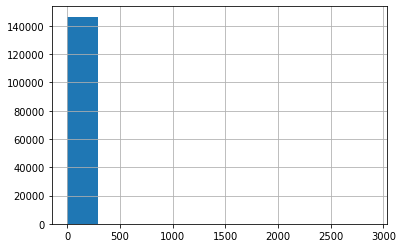

In [188]:
df_x1['duration'].hist()

<AxesSubplot:>

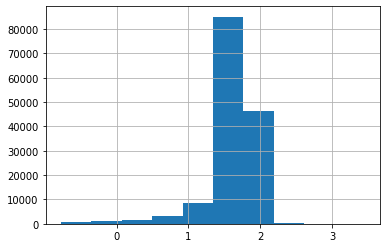

In [189]:
from numpy import log10

df_x1['duration_log']=log10(df_x1['duration'])
df_x1['duration_log'].hist()

In [190]:
q1 = df_x1['duration_log'].quantile(q=0.25)
q3 = df_x1['duration_log'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.2539196343633372

In [191]:
low_outliers = df_x1[df_x1['duration_log'] < (q1-1.5*iqr)]

low_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,duration_log
183695,78,44697899,b2a63f4a-5843-e04d-9e97-a37f7366eb60,2,0,0.166667,True,Malay,Mayans,1728.5,-0.778151
60635,9,43077400,452f9c6f-29b7-0142-ae94-5915576b2aa5,2,0,0.166667,False,Tatars,Lithuanians,1658.5,-0.778151
242991,78,45548750,3d216753-69cb-6747-a4b1-14e24cb5d629,2,0,0.166667,True,Malay,Mongols,1264.5,-0.778151
320104,29,46705085,5e3f3ca0-769e-8f44-9177-9fa5f3d5525d,2,0,0.166667,False,Portuguese,Celts,1178.0,-0.778151
154801,85,44306827,60132994-e3e8-fb40-be22-9c1c9b98dd33,2,0,0.166667,True,Cumans,Japanese,861.5,-0.778151
...,...,...,...,...,...,...,...,...,...,...,...
28110,87,42630955,7183233e-9ed4-1341-a981-c333c4ca9185,2,0,14.366667,False,Teutons,Teutons,557.0,1.157356
300442,9,46408719,ef9331bf-3332-8a48-b3cf-1c259f1e8bb8,2,0,14.366667,False,Mayans,Lithuanians,1176.0,1.157356
220882,9,45269782,f2168cb1-bfc0-c04e-a12d-96de734d7e1e,2,0,14.366667,False,Goths,Vikings,854.0,1.157356
20404,87,42514963,c7a18f55-3611-f64f-8688-ab16e1dd9a50,2,0,14.366667,False,Goths,Persians,898.0,1.157356


In [192]:
high_outliers =  df_x1[ df_x1['duration_log'] > (q3+1.5*iqr)]

high_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,duration_log
65218,9,43163289,e5fa715f-cf84-ee47-8310-4898197aa4d6,2,0,149.000000,False,Mongols,Britons,862.0,2.173186
246510,78,45612024,7b8f66d5-33e8-cc46-9687-d558d9fa3940,2,0,149.200000,True,Malay,Malay,1339.0,2.173769
124377,29,43928256,dd13b96a-f102-924f-a4e2-9804d0d35334,2,0,149.366667,False,Huns,Celts,889.5,2.174254
368166,9,47371160,a8d8a5eb-8379-dc4b-8c98-20fa9494721d,2,0,149.400000,False,Ethiopians,Aztecs,1080.0,2.174351
198908,10,44911134,8f042e11-f533-ac4e-8fe7-9653deea4e23,2,0,149.566667,True,Malay,Saracens,944.5,2.174835
...,...,...,...,...,...,...,...,...,...,...,...
10329,72,42384294,efb56645-93e6-b04d-bda2-e0372a92c32f,2,0,595.466667,False,Celts,Celts,1921.0,2.774857
274899,29,45974510,a9c35929-fb80-884d-87f1-20885afc0991,2,0,1151.633333,False,Mongols,Mongols,987.0,3.061314
245576,29,45600221,6825cbc8-0851-0f4d-b14a-7818e3124755,2,0,1883.800000,False,Portuguese,Portuguese,943.5,3.275035
371201,9,47414297,bb0c143d-1426-2845-815e-cd7680ee7663,2,0,2209.233333,False,Ethiopians,Tatars,917.0,3.344242


In [193]:
df_x1 = df_x1[(df_x1['duration_log'] < (q3+1.5*iqr)) & (df_x1['duration_log'] > (q1-1.5*iqr))]

df_x1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,duration_log
170045,140,44522576,e6013cba-9036-aa48-8bd6-896acf2edc66,2,0,14.400000,True,Malay,Huns,997.5,1.158362
192760,9,44799509,72614991-66ce-7345-afce-b26286bb0378,2,0,14.400000,False,Goths,Teutons,1355.0,1.158362
53752,9,43007779,5d4847b1-3509-0b4c-b737-c23c3571b50d,2,0,14.400000,False,Magyars,Celts,1461.0,1.158362
290193,29,46247151,b4a553af-6b1e-a044-bb66-fce9ecd2214d,2,0,14.400000,False,Teutons,Ethiopians,1387.0,1.158362
162540,78,44427769,114cdce2-7985-8c49-ba13-59f28dd036ac,2,0,14.400000,True,Huns,Khmer,1403.0,1.158362
...,...,...,...,...,...,...,...,...,...,...,...
256147,9,45745996,6bf2337f-dc11-2344-984b-d6da83426355,2,0,148.800000,False,Britons,Malians,1062.0,2.172603
355481,9,47173444,ac951fe8-dff4-fe4a-a7a8-5180e071b853,2,0,148.866667,False,Mongols,Spanish,898.5,2.172797
95687,85,43506920,d5ff6a99-3bed-534f-858f-bad38f1601ae,2,0,148.900000,True,Ethiopians,Teutons,671.0,2.172895
110662,85,43709918,9d4c8ff9-8f94-3c4f-9936-e0174e267b85,2,0,148.900000,True,Italians,Portuguese,971.0,2.172895


In [194]:
df_x1=df_x1.drop('duration_log', 1)

<span style="font-size:larger;">
    Agora faremos a remoção dos outliers da coluna de duração em df_team.
</span>

<AxesSubplot:>

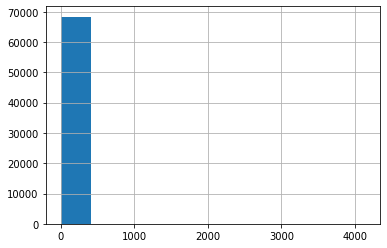

In [195]:
df_team['duration'].hist()

<AxesSubplot:>

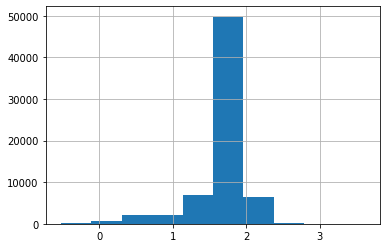

In [196]:
df_team['duration_log']=log10(df_team['duration'])
df_team['duration_log'].hist()

In [197]:
q1 = df_team['duration_log'].quantile(q=0.25)
q3 = df_team['duration_log'].quantile(q=0.75)
iqr = q3 - q1
iqr

0.23921470322458305

In [198]:
low_outliers = df_team[df_team['duration_log'] < (q1-1.5*iqr)]

low_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,duration_log
95920,9,43507566,dfc907a8-ad90-4640-b47d-29000c66dacd,4,0,0.300000,False,Celts,Chinese,NaN,NaN,Britons,Mayans,NaN,NaN,1099.000,-0.522879
245345,23,45599414,168698f0-dbfa-e348-b8ea-5072e9d08d96,4,0,0.333333,False,Persians,Vikings,NaN,NaN,Britons,Magyars,NaN,NaN,984.500,-0.477121
223423,86,45300826,50bf840f-e495-e94f-9acd-9fc9aa50d38b,4,0,0.333333,False,Celts,Turks,NaN,NaN,Burmese,Spanish,NaN,NaN,1231.000,-0.477121
223359,67,45300656,dc856355-6256-f146-a676-8312280ee36e,4,0,0.333333,False,Tatars,Celts,NaN,NaN,Spanish,Burmese,NaN,NaN,1222.250,-0.477121
130005,9,44000454,69e1a060-dd98-2b49-9f43-5aad02df253c,6,0,0.366667,False,Britons,Khmer,Aztecs,NaN,Incas,Khmer,Britons,NaN,1761.500,-0.435729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131605,87,44019407,2aff191b-9b5d-1341-a77c-41448601f9b5,8,0,18.300000,False,Britons,Byzantines,Franks,Italians,Cumans,Mayans,Teutons,Lithuanians,1365.625,1.262451
396681,9,47830134,083b723f-fda0-304f-8d70-1dc1c5c0ea73,4,0,18.300000,False,Celts,Mongols,NaN,NaN,Cumans,Franks,NaN,NaN,1518.000,1.262451
304092,9,46500197,62278484-d51e-3245-ad6a-ebb4abf163cc,4,0,18.300000,False,Byzantines,Celts,NaN,NaN,Ethiopians,Japanese,NaN,NaN,954.000,1.262451
382232,9,47610613,add1eaba-9e00-fc4d-8754-30e4b15da8ae,4,0,18.300000,False,Indians,Mayans,NaN,NaN,Portuguese,Mayans,NaN,NaN,2357.750,1.262451


In [199]:
high_outliers =  df_team[ df_team['duration_log'] > (q3+1.5*iqr)]
high_outliers.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,duration_log
122970,77,43893331,38a68560-7708-8945-8ac2-1f9e24e2abc5,8,0,166.200000,True,Slavs,Spanish,Persians,Lithuanians,Ethiopians,Britons,Cumans,Spanish,1163.375000,2.220631
210650,23,45099528,2999ae5e-e635-b348-9f18-04073763e9bf,4,0,166.233333,False,Bulgarians,Koreans,NaN,NaN,Saracens,Huns,NaN,NaN,925.250000,2.220718
318504,27,46691839,cd1b918e-0fae-c642-9435-c338c88c31e0,6,0,166.333333,False,Malay,Persians,Britons,NaN,Mayans,Mongols,Slavs,NaN,1349.833333,2.220979
219398,27,45251565,440c72ab-1b2d-8c41-9623-d721de9aa696,6,0,166.433333,False,Franks,Chinese,Spanish,NaN,Magyars,Mayans,Teutons,NaN,1226.166667,2.221240
399358,12,47894416,af553aff-1cab-8343-8dcb-8ba9f39bc136,8,1,166.466667,False,Byzantines,Teutons,Indians,Incas,Chinese,Celts,Mongols,Aztecs,937.500000,2.221327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331802,9,46858838,84a5ef33-dd24-924d-8c4a-70866da64258,6,0,1828.866667,False,Magyars,Huns,Byzantines,NaN,Saracens,Indians,Mongols,NaN,1842.000000,3.262182
115552,77,43786139,cf0dd5f5-e1b7-2844-87e1-1374a908b429,8,0,1883.600000,True,Ethiopians,Indians,Franks,Saracens,Britons,Persians,Malay,Vietnamese,1866.625000,3.274989
290497,29,46248125,339ab2a5-9a02-8546-94c5-932a4898a9ee,8,0,1968.533333,False,Burmese,Khmer,Malians,Persians,Bulgarians,Lithuanians,Aztecs,Byzantines,1995.375000,3.294143
248352,29,45625093,f0d7ce45-884a-8940-a12a-ca39269cf0b5,8,0,3403.066667,False,Teutons,Goths,Vietnamese,Slavs,Goths,Khmer,Goths,Celts,1781.000000,3.531870


In [200]:
df_team = df_team[(df_team['duration_log'] < (q3+1.5*iqr)) & (df_team['duration_log'] > (q1-1.5*iqr))]

df_team.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,duration_log
166339,33,44456824,0df0ac8a-c05d-834c-b499-4db5061359c0,8,0,18.333333,True,Berbers,Franks,Lithuanians,Mongols,Spanish,Goths,Portuguese,Italians,1588.000000,1.263241
114305,29,43774014,2a52809a-b466-0242-b5bb-281a1cb7f72f,4,0,18.333333,False,Khmer,Huns,NaN,NaN,Franks,Slavs,NaN,NaN,1257.000000,1.263241
182368,29,44677999,f56da6e4-2e2a-2140-ad56-b244b307e8f7,6,0,18.333333,False,Celts,Saracens,Huns,NaN,Franks,Chinese,Celts,NaN,1282.500000,1.263241
39032,77,42796114,113c2c50-8fac-1546-a1c6-3d32e39ae11d,8,0,18.333333,True,Lithuanians,Persians,Aztecs,Berbers,Teutons,Mongols,Britons,Goths,1428.250000,1.263241
23831,29,42545755,842ed4e6-5e64-594c-bdd5-fa660b941a74,6,0,18.333333,False,Spanish,Britons,Mongols,NaN,Japanese,Franks,Britons,NaN,1366.166667,1.263241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277072,12,46022051,cb3f5f9b-f688-e544-927d-a15e400afe13,4,1,165.300000,False,Saracens,Vikings,NaN,NaN,Britons,Franks,NaN,NaN,866.750000,2.218273
229960,29,45369123,bb47eb4b-c004-2f4c-8b80-3981ea8ac907,8,0,165.300000,False,Burmese,Teutons,Franks,Slavs,Cumans,Persians,Celts,Goths,1219.750000,2.218273
134255,77,44075404,8b9e7f21-4512-0442-bceb-1c7084fade40,6,0,165.366667,True,Celts,Vikings,Mayans,NaN,Britons,Malay,Vikings,NaN,1402.666667,2.218448
243365,29,45568760,fcb1e226-d102-034a-9e90-9fe1c7508576,6,0,165.400000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2047.833333,2.218536


In [201]:
df_team=df_team.drop('duration_log', 1)

<AxesSubplot:>

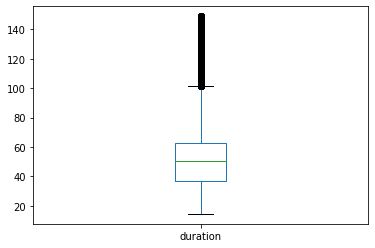

In [202]:
df_x1['duration'].plot.box()

<AxesSubplot:>

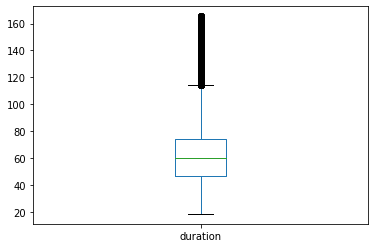

In [203]:
df_team['duration'].plot.box()

<span style="font-size:larger;">
    Partidas de 170 a 120 minutos, dentro do jogo, são partidas longas, mas ainda dentro da normalidade.
</span>

<span style="font-size:larger;">Vamos verificar agora a coluna de average rating</span>

<AxesSubplot:>

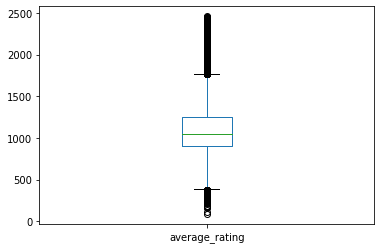

In [204]:
df_x1['average_rating'].plot.box()

<AxesSubplot:>

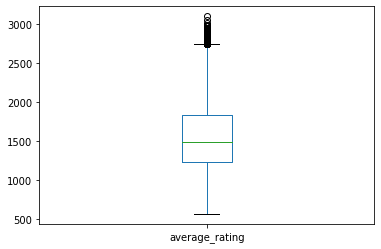

In [205]:
df_team['average_rating'].plot.box()

<span style="font-size:larger;">
    Por mais que sejam de fato pontos fora da curva, esses dados estão corretos, a situação é que há alguns 
    jogadores com classificação muito alta e outros com classificação muito baixa.
</span>

<span style="font-size:larger;">
    Normalização.
</span>

Vamos normalizar a coluna de "average_rating" nos DataFrames

In [206]:
df_x1['average_rating_normalized'] = (df_x1['average_rating'] - df_x1['average_rating'].min()) / (df_x1['average_rating'].max() - df_x1['average_rating'].min())
df_x1.sort_values('average_rating_normalized')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,average_rating_normalized
380271,29,47584341,279f29e4-d5d0-0f4c-a543-f9ff5983da65,2,0,66.333333,False,Huns,Teutons,87.0,0.000000
316625,29,46665643,e7f74f41-3e25-a645-9a56-0c55f1c9c995,2,0,33.033333,False,Teutons,Britons,111.5,0.010333
93399,17,43485516,fe8f26ce-59a4-334d-af7f-5766a328eb06,2,0,35.966667,False,Mongols,Franks,160.0,0.030789
366974,77,47351961,05de78ea-938a-8248-bba7-822d548eb161,2,0,69.166667,True,Celts,Teutons,168.5,0.034374
349200,29,47076649,606c75dc-e840-dd4d-b575-e4f9b2b9fe10,2,0,112.566667,False,Portuguese,Teutons,171.0,0.035428
...,...,...,...,...,...,...,...,...,...,...,...
84894,9,43377027,1f99405c-bc4d-9a42-8f60-bef30926a67c,2,0,53.466667,False,Vietnamese,Cumans,2443.0,0.993674
180168,32,44637292,4b47c122-080c-0a45-8fad-80c834fa8a20,2,0,41.466667,False,Khmer,Saracens,2451.0,0.997048
192252,9,44797849,52fd5313-cb82-8345-aafe-7b913078456e,2,0,58.300000,False,Britons,Byzantines,2452.0,0.997469
193460,78,44817257,a9958d29-afb6-ec49-9367-2246a518f9ba,2,0,51.933333,True,Slavs,Bulgarians,2454.5,0.998524


In [207]:
df_team['average_rating_normalized'] = (df_team['average_rating'] - df_team['average_rating'].min()) / (df_team['average_rating'].max() - df_team['average_rating'].min())
df_team.sort_values('average_rating_normalized')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,average_rating_normalized
395603,77,47815107,b1f4e01d-da95-f04d-9ca2-c7950ffc2f34,4,0,117.800000,True,Franks,Portuguese,NaN,NaN,Britons,Khmer,NaN,NaN,565.000000,0.000000
77435,12,43308978,466b37f2-5a19-c040-b0b1-2334c92afeee,4,1,79.466667,False,Bulgarians,Chinese,NaN,NaN,Cumans,Khmer,NaN,NaN,593.000000,0.011029
390942,9,47775445,48999e37-b950-c447-b22d-5b404399f3c1,4,0,120.633333,False,Franks,Magyars,NaN,NaN,Khmer,Britons,NaN,NaN,594.000000,0.011423
244324,12,45585032,838d1c30-5ea2-0248-b68b-6d46abe361ec,4,1,62.700000,False,Magyars,Teutons,NaN,NaN,Goths,Persians,NaN,NaN,594.000000,0.011423
183257,12,44696358,7b175268-bc9f-6748-a5ea-85bf0aa18c3b,4,1,82.433333,False,Persians,Teutons,NaN,NaN,Japanese,Mongols,NaN,NaN,600.000000,0.013786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365920,17,47335897,9d32c42c-8e3c-c74b-ab37-c253026e4dc4,6,0,51.700000,False,Britons,Indians,Mayans,NaN,Britons,Indians,Chinese,NaN,2993.333333,0.956507
219366,33,45251354,a3bc8cae-c1ba-1b4d-890b-971676ba1859,8,0,52.133333,True,Vikings,Mayans,Lithuanians,Ethiopians,Koreans,Aztecs,Portuguese,Britons,2997.000000,0.957952
339602,11,46964155,f608982a-de7e-7245-a969-e7ab19d433d1,4,0,43.933333,True,Vikings,Italians,NaN,NaN,Italians,Vikings,NaN,NaN,3021.000000,0.967405
329065,9,46837279,64d93f26-8a46-0441-b3f7-5010fd1831e0,6,0,52.300000,False,Ethiopians,Indians,Britons,NaN,Britons,Indians,Mayans,NaN,3054.333333,0.980535


<span style="font-size:larger;">
    Discretização.
</span>

Vamos discretizar a coluna de "duration" nos DataFrames, e classificar as partidas entre: curta, média e longa duração.

In [208]:
duration_class = ['short','medium','long']
df_x1['duration'] = pandas.cut(df_x1['duration'],3,labels = duration_class)
df_x1['duration'].value_counts()

short     94099
medium    41221
long       2055
Name: duration, dtype: int64

In [209]:
df_x1['duration']=df_x1['duration'].astype('category')

In [210]:
df_x1.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv,lCiv,average_rating,average_rating_normalized
196416,9,44878998,ae35ba76-57f1-5b48-97d9-c44a8c748e98,2,0,short,False,Lithuanians,Franks,917.5,0.350274
239355,9,45492432,006fe3c1-990e-0a47-abd3-77219906b736,2,0,short,False,Goths,Malay,1431.0,0.566849
239348,10,45492347,9e8fb329-e5c6-dd40-9fb2-10669df1c2fe,2,0,short,True,Vikings,Vikings,991.5,0.381485
239347,140,45492364,0619ba89-b91f-6843-8f38-e7681c83f080,2,0,short,True,Mayans,Japanese,913.5,0.348587
239337,9,45492346,ec168004-a23f-fc49-b55e-f51021ef40ad,2,0,short,False,Khmer,Malians,1744.5,0.699072
...,...,...,...,...,...,...,...,...,...,...,...
79913,9,43329795,b5b84f7e-b1a1-ee41-a1ad-2311ad979333,2,0,long,False,Lithuanians,Mayans,759.5,0.283636
12637,9,42412087,9df657eb-47a4-ff44-9dba-39822ebad087,2,0,long,False,Japanese,Mongols,1104.0,0.428933
34333,9,42703346,3ecb109c-a4cc-d244-a26c-167a42ff66fd,2,0,long,False,Italians,Celts,713.0,0.264024
286914,9,46166024,de44a572-2325-d044-a999-b0adb661cf6e,2,0,long,False,Byzantines,Franks,1326.0,0.522564


In [211]:
duration_class = ['short','medium','long']
df_team['duration'] = pandas.cut(df_team['duration'],3,labels = duration_class)
df_team['duration'].value_counts()

short     40395
medium    20304
long       1623
Name: duration, dtype: int64

In [212]:
df_team['duration']=df_team['duration'].astype('category')

In [213]:
df_team.sort_values('duration')

,map_type,match_id,match_uuid,num_players,visibility,duration,has_relevant_water,wCiv1,wCiv2,wCiv3,wCiv4,lCiv1,lCiv2,lCiv3,lCiv4,average_rating,average_rating_normalized
8,29,42282481,1fb40655-3a85-cf46-bd8b-d2ac6b28aa0d,6,0,short,False,Britons,Persians,Teutons,NaN,Mayans,Italians,Malians,NaN,1357.000000,0.311965
241379,29,45524915,c8857342-e4b4-3249-bcb4-ceda4782b6ff,4,0,short,False,Indians,Mayans,NaN,NaN,Slavs,Ethiopians,NaN,NaN,2024.750000,0.574988
241382,29,45524919,09afb426-0a9d-584e-bf7f-11d5954ea61b,4,0,short,False,Vikings,Burmese,NaN,NaN,Slavs,Aztecs,NaN,NaN,1725.500000,0.457115
241401,29,45525004,f2f4f130-0897-554c-b922-1a3a38f1c68d,8,0,short,False,Franks,Mongols,Lithuanians,Vietnamese,Britons,Persians,Magyars,Mongols,1183.285714,0.243539
241405,29,45525132,c866fcc4-566a-7a4a-abab-7b234d159308,6,0,short,False,Burmese,Goths,Khmer,NaN,Koreans,Indians,Teutons,NaN,1368.333333,0.316429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364191,29,47317270,3b385040-a3f8-1b42-8736-329edc30e336,4,0,long,False,Persians,Teutons,NaN,NaN,Byzantines,Huns,NaN,NaN,1056.000000,0.193402
220328,9,45267880,da75b023-37e9-0947-a127-fffbe8cd6732,4,0,long,False,Franks,Persians,NaN,NaN,Britons,Franks,NaN,NaN,1456.000000,0.350960
386494,77,47705393,192bac2c-6b06-6845-bc3c-cef5628696fd,6,0,long,True,Byzantines,Italians,Slavs,NaN,Byzantines,Huns,Turks,NaN,1128.000000,0.221763
145027,77,44198679,c18b55c9-caff-c145-b1d3-3fc51d8b524a,8,0,long,True,Teutons,Vietnamese,Huns,Vikings,Berbers,Incas,Lithuanians,Khmer,1325.250000,0.299458


In [214]:
df_x1=df_x1.reset_index().drop('index', 1)

In [215]:
df_team=df_team.reset_index().drop('index', 1)

In [216]:
df_team_2x2=df_team[df_team['num_players'] == 4]

In [217]:
df_team_2x2['average_rating'].describe()

count    30248.000000
mean      1466.600304
std        409.575147
min        565.000000
25%       1164.750000
50%       1407.000000
75%       1703.500000
max       3103.750000
Name: average_rating, dtype: float64

In [218]:
df_team_2x2=df_team_2x2[df_team_2x2['average_rating'] >= 1164.750000]

<AxesSubplot:>

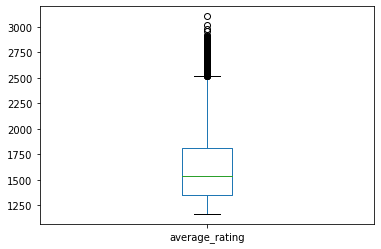

In [219]:
df_team_2x2['average_rating'].plot.box()

In [220]:
df_team_2x2=df_team_2x2.drop(['map_type', 'match_id', 'match_uuid', 'visibility', 'duration', 'num_players', 'wCiv3', 'wCiv4', 'lCiv3', 'lCiv4', 'average_rating', 'average_rating_normalized'], 1)

In [221]:
df_team_2x2=df_team_2x2.reset_index().drop('index', 1)

In [222]:
df_team_2x2

,has_relevant_water,wCiv1,wCiv2,lCiv1,lCiv2
0,True,Celts,Persians,Franks,Mayans
1,False,Vikings,Britons,Spanish,Saracens
2,False,Huns,Mayans,Indians,Incas
3,False,Bulgarians,Celts,Goths,Magyars
4,False,Celts,Khmer,Britons,Khmer
...,...,...,...,...,...
22685,False,Britons,Bulgarians,Malians,Slavs
22686,True,Vikings,Spanish,Indians,Mayans
22687,False,Vietnamese,Persians,Mongols,Persians
22688,False,Franks,Mongols,Vikings,Franks


In [223]:
df_team_2x2.to_json('../2x2_matches_dataset.json')